In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import csv
import os
import random

In [14]:
# size of subnetwork
subnet_total = 0
for filename in os.listdir("./t2_extract/flow-continue/"):
    df = pd.read_csv("./t2_extract/flow-continue/"+filename)
    subnet_total += df.shape[0]

In [15]:
sample_index = sorted(random.sample(range(1,2325854078+1),subnet_total))

In [10]:
with open("./t2_sample_ipv4.csv",'a') as new_f:
    ipv4_count = 0
    for filename in os.listdir("G:/dataset/flow-continue"):
        with open(os.path.join("G:/dataset/flow-continue/", filename),'r') as f:
            for line in f:
                if '#' not in line:
                    part = line.split('\t')[0]
                    if '.' in part:
                        ipv4_count += 1
                    if ipv4_count == sample_index[0]:
                        sample_index.pop(0)
                        new_f.write(line)
                    if sample_index == []:
                        break
                    
                


        

In [16]:
# total of IPv6 flows
with open("./t2_sample_ipv6.csv",'a') as new_f:
    ipv6_count = 0
    for filename in os.listdir("G:/dataset/flow-continue"):
        with open(os.path.join("G:/dataset/flow-continue/", filename),'r') as f:
            for line in f:
                if '#' not in line:
                    part = line.split('\t')[0]
                    if ':' in part:
                        ipv6_count += 1
                    
    print(ipv6_count)

17490978


In [17]:
sample_index = sorted(random.sample(range(1,17490978+1),subnet_total))

In [18]:
with open("./t2_sample_ipv6.csv",'a') as new_f:
    ipv6_count = 0
    for filename in os.listdir("G:/dataset/flow-continue"):
        with open(os.path.join("G:/dataset/flow-continue/", filename),'r') as f:
            for line in f:
                if '#' not in line:
                    part = line.split('\t')[0]
                    if ':' in part:
                        ipv6_count += 1
                    if ipv6_count == sample_index[0]:
                        sample_index.pop(0)
                        new_f.write(line)
                    if sample_index == []:
                        break

select task 2.1 -> 1.5

Text(0, 0.5, 'Traffic Volume[bytes]')

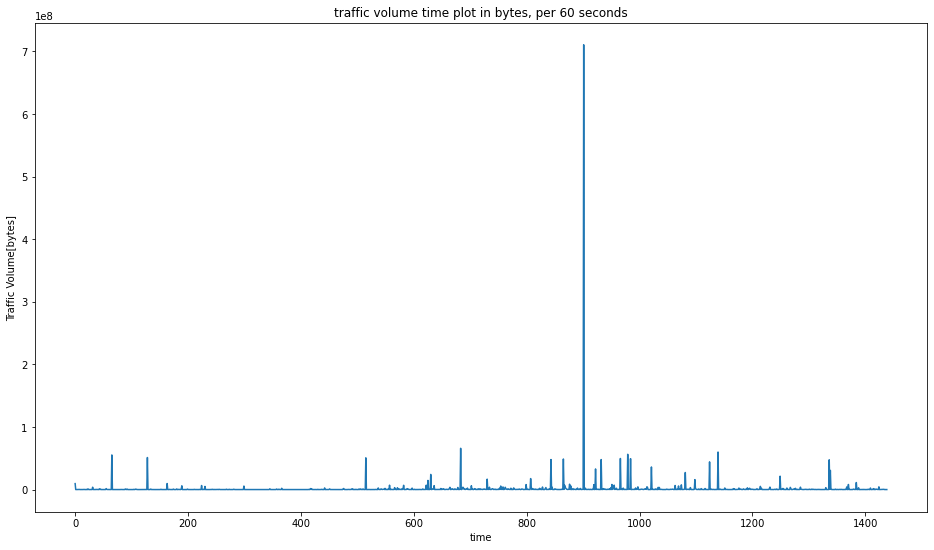

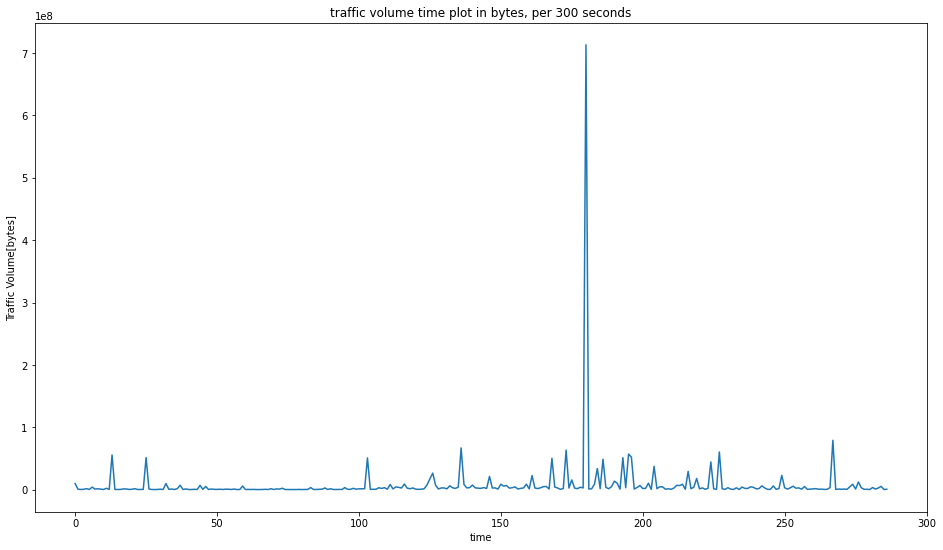

In [25]:
df_ipv4 = pd.read_csv("t2_sample_ipv4.csv",names = ['src', 'dst', 'pro', 'ok', 'sport', 'dport', 'pkts', 'bytes','flows', 'first', 'latest'], sep='\t')
df_ipv4 = df_ipv4.sort_values("first")

init_time = float(df_ipv4.loc[:,'first'].min())
time_scale_1 = 60
time_scale_2 = 300

volumes_list = []
cur_period = 0
period_i = 0
for index, row in df_ipv4.iterrows():
    time = float(row['first'])
    if time-init_time >= period_i*time_scale_1 and time-init_time <= (period_i+1)*time_scale_1:
        cur_period += int(row['bytes'])
    else:
        volumes_list.append(cur_period)
        cur_period = 0
        period_i += 1

plt.figure(figsize=(16,9))
plt.plot(np.array(volumes_list))
plt.title("traffic volume time plot in bytes, per "+str(time_scale_1)+" seconds")
plt.xlabel("time")
plt.ylabel("Traffic Volume[bytes]")

volumes_list = []
cur_period = 0
period_i = 0
for index, row in df_ipv4.iterrows():
    time = float(row['first'])
    if time-init_time >= period_i*time_scale_2 and time-init_time <= (period_i+1)*time_scale_2:
        cur_period += int(row['bytes'])
    else:
        volumes_list.append(cur_period)
        cur_period = 0
        period_i += 1

plt.figure(figsize=(16,9))
plt.plot(np.array(volumes_list))
plt.title("traffic volume time plot in bytes, per "+str(time_scale_2)+" seconds")
plt.xlabel("time")
plt.ylabel("Traffic Volume[bytes]")


Text(0, 0.5, 'Traffic Volume[bytes]')

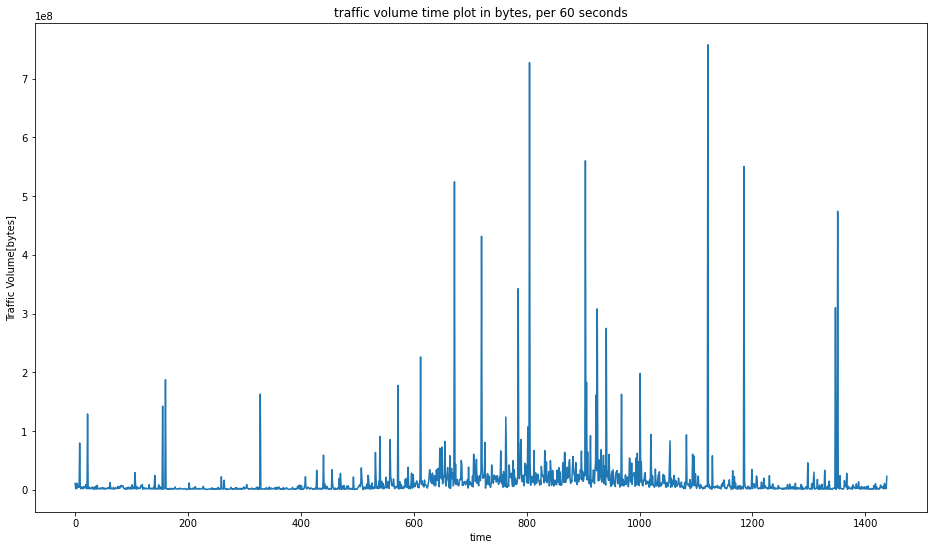

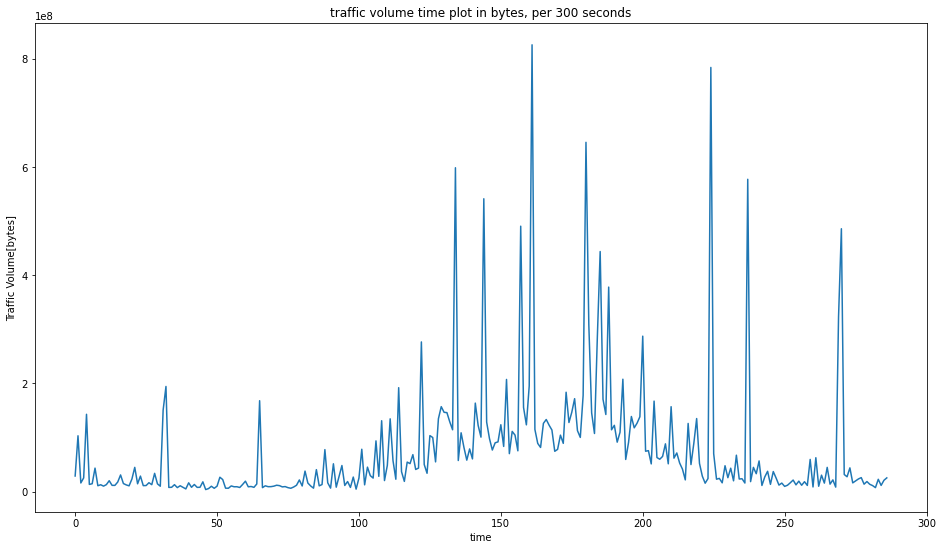

In [26]:
df_ipv6 = pd.read_csv("t2_sample_ipv6.csv",names = ['src', 'dst', 'pro', 'ok', 'sport', 'dport', 'pkts', 'bytes','flows', 'first', 'latest'], sep='\t')
df_ipv6 = df_ipv6.sort_values("first")

init_time = float(df_ipv6.loc[:,'first'].min())
time_scale_1 = 60
time_scale_2 = 300

volumes_list = []
cur_period = 0
period_i = 0
for index, row in df_ipv6.iterrows():
    time = float(row['first'])
    if time-init_time >= period_i*time_scale_1 and time-init_time <= (period_i+1)*time_scale_1:
        cur_period += int(row['bytes'])
    else:
        volumes_list.append(cur_period)
        cur_period = 0
        period_i += 1

plt.figure(figsize=(16,9))
plt.plot(np.array(volumes_list))
plt.title("traffic volume time plot in bytes, per "+str(time_scale_1)+" seconds")
plt.xlabel("time")
plt.ylabel("Traffic Volume[bytes]")

volumes_list = []
cur_period = 0
period_i = 0
for index, row in df_ipv6.iterrows():
    time = float(row['first'])
    if time-init_time >= period_i*time_scale_2 and time-init_time <= (period_i+1)*time_scale_2:
        cur_period += int(row['bytes'])
    else:
        volumes_list.append(cur_period)
        cur_period = 0
        period_i += 1

plt.figure(figsize=(16,9))
plt.plot(np.array(volumes_list))
plt.title("traffic volume time plot in bytes, per "+str(time_scale_2)+" seconds")
plt.xlabel("time")
plt.ylabel("Traffic Volume[bytes]")